In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/dataset.csv')
df

,label,number_of_files
0,brain_glioma,2004
1,brain_menin,2004
2,brain_tumor,2048


In [7]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === STEP 1: UNZIP FILE ===
zip_path = '/content/archive (2).zip'
extract_path = '/content/brain_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# === STEP 2: FIND THE INNER DATASET FOLDER ===
# Adjust the path if the extracted folder has a subfolder inside
for root, dirs, files in os.walk(extract_path):
    if any(os.path.isdir(os.path.join(root, d)) for d in dirs):
        dataset_dir = os.path.join(root, dirs[0])  # use first valid subdirectory
        break

print(f"Dataset directory: {dataset_dir}")

# === STEP 3: DATA PREPROCESSING ===
image_size = (224, 224)
batch_size = 32
epochs = 1

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# === STEP 4: MODEL BUILDING ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# === STEP 5: TRAIN THE MODEL ===
model.fit(train_data, validation_data=val_data, epochs=epochs)

# === STEP 6: SAVE THE MODEL ===
model.save("/content/brain_tumor_model.h5")
print("Model saved to /content/brain_tumor_model.h5")


Dataset directory: /content/brain_dataset/Brain_Cancer raw MRI data
Found 4845 images belonging to 1 classes.
Found 1211 images belonging to 1 classes.
152/152 ━━━━━━━━━━━━━━━━━━━━ 642s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


Model saved to /content/brain_tumor_model.h5


Dataset directory: /content/brain_dataset/Brain_Cancer raw MRI data
Found 4240 images belonging to 1 classes.
Found 1816 images belonging to 1 classes.
133/133 ━━━━━━━━━━━━━━━━━━━━ 531s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00

✅ Final Test Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


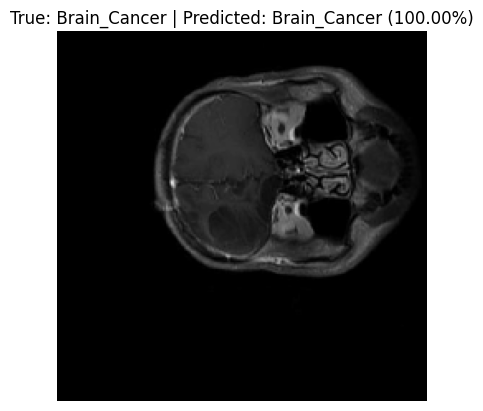

In [9]:
import zipfile, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# === STEP 1: UNZIP ===
zip_path = '/content/archive (2).zip'
extract_path = '/content/brain_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find the real dataset directory
for root, dirs, files in os.walk(extract_path):
    if any(os.path.isdir(os.path.join(root, d)) for d in dirs):
        dataset_dir = os.path.join(root, dirs[0])
        break

print(f"Dataset directory: {dataset_dir}")

# === STEP 2: IMAGE GENERATOR ===
image_size = (224, 224)
batch_size = 32
epochs = 1

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3  # 70% train, 30% test
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# === STEP 3: MODEL ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# === STEP 4: TRAIN ===
model.fit(train_data, validation_data=test_data, epochs=epochs)

# === STEP 5: EVALUATE ===
loss, accuracy = model.evaluate(test_data)
print(f"\n✅ Final Test Accuracy: {accuracy * 100:.2f}%")

# === STEP 6: PREDICT AND DISPLAY ONE ===
class_names = list(train_data.class_indices.keys())

# Get one test image
test_imgs, test_labels = next(test_data)
img = test_imgs[0]
true_label = class_names[np.argmax(test_labels[0])]

# Predict
pred = model.predict(np.expand_dims(img, axis=0))[0]
pred_label = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100

# Show image
plt.imshow(img)
plt.title(f"True: {true_label} | Predicted: {pred_label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

# === OPTIONAL: Save model ===
model.save("/content/brain_tumor_model_70_30.h5")
